###CAO Points Analysis

In [121]:
# Convenient HTTP requests.
import requests as rq

# Regular expressions.
import re

# Dates and times.
import datetime as dt

# Data frames.
import pandas as pd

# For downloading.
import urllib.request as urlrq

#for plotting
import matplotlib.pyplot as plt


import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly import subplots
from plotly.subplots import make_subplots

In [2]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

### 2021 Points
http://www.cao.ie/index.php?page=points&p=2021

In [3]:
# Fetch the CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l8.php')

# Have a quick peek. 200 means OK.
resp

<Response [200]>

# Save the original data set 

In [4]:
# Create a file path for the original data.
pathhtml = 'data/cao2021_' + nowstr + '.html'


In [5]:
# The server uses the wrong encoding, fix it.
original_encoding = resp.encoding

# Change to cp1252.
resp.encoding = 'cp1252'

In [6]:
# Save the original html file.
with open(pathhtml, 'w') as f:
    f.write(resp.text)

In [7]:
# Compile the regular expression for matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

In [8]:
# The file path for the csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'

In [9]:
# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


In [10]:
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [11]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


### 2020 Points
https://www.cao.ie/index.php?page=points&p=2020

In [12]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [13]:
# Create a file path for the original data.
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [14]:
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20211214_093941.xlsx',
 <http.client.HTTPMessage at 0x267c46d34f0>)

In [15]:
# Download and parse the excel spreadsheet.
df2020 = pd.read_excel(url2020, skiprows=10)

In [16]:
df2020


,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Spot check a random row.
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [18]:
# Spot check the last row.
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [19]:
# Create a file path for the pandas data.
path2020 = 'data/cao2020_' + nowstr + '.csv'

In [20]:
# Save pandas data frame to disk.
df2020.to_csv(path2020)

<br>

# CAO 2019 POINTS

***

http://www2.cao.ie/points/lvl8_19.pdf

### Steps to reproduce

- Download original pdf file.
- Open original pdf file in microsoft word.
- Save Mircosoft Word's converted pdf in the docx format.
- Resave word document for editing.
- Delete headers and footers.
- Delete preample in page 1.
- Select all and copy to notepad++.
- Delete blank lines and remove HEI headings and paste onto each course line respectively (using alt + scroll down).
- Insert double quotes along the HEI title as this will make it easier to edit using regular expressions. 
- Change backtick's to apostrophes.
- Go to repleace all with \t (tab delimiter) and replace with comma(,) as it is a CSV file.
- Many commas throughout the document so we couldn't load the dataframe as a csv file. Instead we went back to original format with the delimiter as the tab.
- When reading data in the sep = '\t' was used as the delimiter for separating the columns.
- Errors occured while laoding this data because unknowningly there were some double tabs on the document. Fix was to replace \t\t with \t. DF was able to be read in after this.
- I went back to the dataset and then replaced all ` back ticks ` with the correct ' forward tick mark.

In [21]:
df2019 = pd.read_csv('data/cao2019_20211211_edited.txt', sep = '\t')

In [22]:
df2019

,Course Code,INSTITUTION and COURSE,EOS,Mid
Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming,304,328.0
Athlone Institute of Technology,AL802,Software Design with Cloud Computing,301,306.0
Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...,309,337.0
Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure,329,442.0
Athlone Institute of Technology,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
Waterford Institute of Technology,WD200,Arts (options),221,296.0
Waterford Institute of Technology,WD210,Software Systems Development,271,329.0
Waterford Institute of Technology,WD211,Creative Computing,275,322.0
Waterford Institute of Technology,WD212,Recreation and Sport Management,274,311.0


#  Concat and Join the Points

In [23]:
courses2021 = df2021[['code', 'title']]
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [24]:
courses2020 = df2020[['COURSE CODE2','COURSE TITLE']]
courses2020.columns = ['code', 'title']
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [25]:
courses2019 = df2019[['Course Code','INSTITUTION and COURSE']]
courses2019.columns = ['code', 'title']
courses2019

,code,title
Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming
Athlone Institute of Technology,AL802,Software Design with Cloud Computing
Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...
Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure
Athlone Institute of Technology,AL810,Quantity Surveying
...,...,...
Waterford Institute of Technology,WD200,Arts (options)
Waterford Institute of Technology,WD210,Software Systems Development
Waterford Institute of Technology,WD211,Creative Computing
Waterford Institute of Technology,WD212,Recreation and Sport Management


In [26]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [27]:
allcourses.sort_values('code')

,code,title
175,AC120,International Business
949,AC120,International Business
2581,AC120,International Business
950,AC137,Liberal Arts
2582,AC137,Liberal Arts
...,...,...
946,WD230,Mechanical and Manufacturing Engineering
3343,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education
948,WD232,Business Information Systems


In [28]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [29]:
allcourses[allcourses.duplicated()]
allcourses.drop_duplicates()
allcourses[allcourses.duplicated(subset=['code'])]
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [30]:
# Returns a copy of the data frame with duplciates removed.
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1647,SG441,Environmental Science
1648,SG446,Applied Archaeology
1649,TL803,Music Technology
1650,TL812,Computing with Digital Media


In [31]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated(subset=['code'])]

,code,title


In [32]:
# Returns a copy of the data frame with duplciates removed - based only on code.
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [33]:
# Set the index to the code column.
df2021.set_index('code', inplace=True)
df2021.columns = ['title', 'points_r1_2021', 'points_r2_2021']
df2021

,title,points_r1_2021,points_r2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [34]:
# Set the index to the code column.
allcourses.set_index('code', inplace=True)

In [35]:
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

,title,points_r1_2021
code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


In [36]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']
df2020_r1

,code,points_r1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [37]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [38]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_r1)
allcourses

,title,points_r1_2021,points_r1_2020
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [39]:
# I have just realised now when doing the round 2 points tat I originally used EOS as the column for round 1 instead of Mid. The Mid points are much higher so much be the R1 points. 
df2019_r1 = df2019[['Course Code', 'Mid']]
df2019_r1.columns = ['code', 'points_r1_2019']
df2019_r1

,code,points_r1_2019
Athlone Institute of Technology,AL801,328.0
Athlone Institute of Technology,AL802,306.0
Athlone Institute of Technology,AL803,337.0
Athlone Institute of Technology,AL805,442.0
Athlone Institute of Technology,AL810,349.0
...,...,...
Waterford Institute of Technology,WD200,296.0
Waterford Institute of Technology,WD210,329.0
Waterford Institute of Technology,WD211,322.0
Waterford Institute of Technology,WD212,311.0


In [40]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019
code,
AL801,328.0
AL802,306.0
AL803,337.0
AL805,442.0
AL810,349.0
...,...
WD200,296.0
WD210,329.0
WD211,322.0


In [41]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2019_r1)
allcourses

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,328.0
AL802,Software Design in Artificial Intelligence for...,313,332,306.0
AL803,Software Design for Mobile Apps and Connected ...,350,337,337.0
AL805,Computer Engineering for Network Infrastructure,321,333,442.0
AL810,Quantity Surveying,328,319,349.0
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,358.0
SG446,Applied Archaeology,NaN,NaN,290.0
TL803,Music Technology,NaN,NaN,288.0


In [42]:
pd.set_option("display.max_columns", None)
allcourses.describe()

,points_r1_2019
count,915.000000
mean,426.414208
std,133.142255
min,57.000000
25%,339.000000
50%,397.000000
75%,477.500000
max,1073.000000


In [43]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1652 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1651 non-null   object 
 1   points_r1_2021  928 non-null    object 
 2   points_r1_2020  1437 non-null   object 
 3   points_r1_2019  915 non-null    float64
dtypes: float64(1), object(3)
memory usage: 129.1+ KB


In [44]:
allcourses. iloc[200:300]

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
DB527,Applied Social Care,254,234,288.0
DB531,Marketing,288,293,288.0
DB562,Psychology,244,243,310.0
DB566,Social Science,262,220,308.0
DB567,Film and Creative Media,245,218,295.0
...,...,...,...,...
GC301,Accounting and Finance,NaN,253,314.0
GC302,Business - HRM,377,NaN,269.0
GC307,Business (Marketing),289,NaN,NaN


In [45]:
df2021.iloc[200]


title             Applied Social Care
points_r1_2021                    254
points_r2_2021                    219
Name: DB527, dtype: object

In [46]:
# I want to drop all the NaN Values as I can't compare these courses correctly over the years 
#https://sparkbyexamples.com/pandas/pandas-drop-rows-with-nan-values-in-dataframe/#:~:text=Alternatively%2C%20you%20can%20also%20use%20axis%3D0%20as%20a,you%20can%20do%20so%20using%20reset_index%20%28%29%20method.
allcourses1=allcourses.dropna()

In [47]:
allcourses2=allcourses1.replace('#','', regex=True)
#df = df.replace('old character','new character', regex=True)
#https://datatofish.com/replace-character-pandas-dataframe/
#https://pythonexamples.org/pandas-dataframe-select-columns-of-numeric-datatype/

In [48]:
allcourses2

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,328.0
AL802,Software Design in Artificial Intelligence for...,313,332,306.0
AL803,Software Design for Mobile Apps and Connected ...,350,337,337.0
AL805,Computer Engineering for Network Infrastructure,321,333,442.0
AL810,Quantity Surveying,328,319,349.0
...,...,...,...,...
WD200,Arts (options),201,AQA,296.0
WD210,Software Systems Development,260,279,329.0
WD211,Creative Computing,270,271,322.0


In [49]:
allcourses2.tail()

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
WD200,Arts (options),201,AQA,296.0
WD210,Software Systems Development,260,279,329.0
WD211,Creative Computing,270,271,322.0
WD212,Recreation and Sport Management,262,270,311.0
WD230,Mechanical and Manufacturing Engineering,230,253,348.0


In [50]:
allcourses3=allcourses2.replace('AQA','', regex=True)


In [51]:
allcourses3

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,328.0
AL802,Software Design in Artificial Intelligence for...,313,332,306.0
AL803,Software Design for Mobile Apps and Connected ...,350,337,337.0
AL805,Computer Engineering for Network Infrastructure,321,333,442.0
AL810,Quantity Surveying,328,319,349.0
...,...,...,...,...
WD200,Arts (options),201,,296.0
WD210,Software Systems Development,260,279,329.0
WD211,Creative Computing,270,271,322.0


In [52]:
allcourses3.tail()

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
WD200,Arts (options),201,,296.0
WD210,Software Systems Development,260,279,329.0
WD211,Creative Computing,270,271,322.0
WD212,Recreation and Sport Management,262,270,311.0
WD230,Mechanical and Manufacturing Engineering,230,253,348.0


In [53]:
import numpy as np
allcourses3 = allcourses3.astype({'points_r1_2021': np.float64,'points_r1_2020': np.float64, 'points_r1_2019': np.float64}, errors='ignore')

In [54]:
allcourses3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, AL801 to WD230
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           727 non-null    object 
 1   points_r1_2021  727 non-null    object 
 2   points_r1_2020  727 non-null    object 
 3   points_r1_2019  727 non-null    float64
dtypes: float64(1), object(3)
memory usage: 28.4+ KB


In [55]:
allcourses3.sort_values(['points_r1_2021','points_r1_2020','points_r1_2019'], inplace=True)
allcourses3

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,Early Childhood - Teaching and Learning (part-...,,327,358.0
MH116,Community and Youth Work (Full-Time),,,271.0
MH103,Music,,,367.0
CR125,Popular Music at CIT Cork School of Music,1028,1088,1021.0
GA887,History and Geography,201,244,296.0
...,...,...,...,...
LC518,Digital Animation Production (portfolio),807,808,962.0
LC502,Game Art and Design (portfolio),841,852,950.0
CR121,Music at CIT Cork School of Music,904,868,1052.0


In [56]:
allcourses3.head()
allcourses3.tail()

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
LC518,Digital Animation Production (portfolio),807,808,962.0
LC502,Game Art and Design (portfolio),841,852,950.0
CR121,Music at CIT Cork School of Music,904,868,1052.0
LC114,Fashion and Textiles for Product and Costume (...,914,880,988.0
DL832,Animation,989,920,1055.0


In [57]:
ac3=allcourses3

In [58]:
ac3

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,Early Childhood - Teaching and Learning (part-...,,327,358.0
MH116,Community and Youth Work (Full-Time),,,271.0
MH103,Music,,,367.0
CR125,Popular Music at CIT Cork School of Music,1028,1088,1021.0
GA887,History and Geography,201,244,296.0
...,...,...,...,...
LC518,Digital Animation Production (portfolio),807,808,962.0
LC502,Game Art and Design (portfolio),841,852,950.0
CR121,Music at CIT Cork School of Music,904,868,1052.0


In [59]:
ac3.head(10)

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,Early Childhood - Teaching and Learning (part-...,,327,358.0
MH116,Community and Youth Work (Full-Time),,,271.0
MH103,Music,,,367.0
CR125,Popular Music at CIT Cork School of Music,1028,1088,1021.0
GA887,History and Geography,201,244,296.0
WD200,Arts (options),201,,296.0
MI001,Contemporary and Applied Theatre Studies,209,375,381.0
DB510,Audio Production and Music Project Management,217,234,293.0
GA380,International Hotel Management,218,242,289.0


In [60]:
ac3.describe()

,points_r1_2019
count,727.000000
mean,429.325997
std,122.039948
min,57.000000
25%,347.000000
50%,403.000000
75%,488.000000
max,1055.000000


In [61]:
ac3.dtypes
pd.to_numeric(ac3.points_r1_2021, errors='coerce')

code
MH801       NaN
MH116       NaN
MH103       NaN
CR125    1028.0
GA887     201.0
          ...  
LC518     807.0
LC502     841.0
CR121     904.0
LC114     914.0
DL832     989.0
Name: points_r1_2021, Length: 727, dtype: float64

In [62]:
pd.to_numeric(ac3.points_r1_2020, errors = 'coerce')

code
MH801     327.0
MH116       NaN
MH103       NaN
CR125    1088.0
GA887     244.0
          ...  
LC518     808.0
LC502     852.0
CR121     868.0
LC114     880.0
DL832     920.0
Name: points_r1_2020, Length: 727, dtype: float64

In [63]:
pd.to_numeric(ac3.points_r1_2019, errors = 'coerce')

code
MH801     358.0
MH116     271.0
MH103     367.0
CR125    1021.0
GA887     296.0
          ...  
LC518     962.0
LC502     950.0
CR121    1052.0
LC114     988.0
DL832    1055.0
Name: points_r1_2019, Length: 727, dtype: float64

In [64]:
ac3

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,Early Childhood - Teaching and Learning (part-...,,327,358.0
MH116,Community and Youth Work (Full-Time),,,271.0
MH103,Music,,,367.0
CR125,Popular Music at CIT Cork School of Music,1028,1088,1021.0
GA887,History and Geography,201,244,296.0
...,...,...,...,...
LC518,Digital Animation Production (portfolio),807,808,962.0
LC502,Game Art and Design (portfolio),841,852,950.0
CR121,Music at CIT Cork School of Music,904,868,1052.0


In [65]:
ac3['points_r1_2021']=pd.to_numeric(ac3['points_r1_2021'], errors='coerce').astype('float64')
ac3['points_r1_2020']=pd.to_numeric(ac3['points_r1_2020'], errors='coerce').astype('float64')
ac3['points_r1_2019']=pd.to_numeric(ac3['points_r1_2019'], errors='coerce').astype('float64')

In [66]:
ac3.nlargest(5, ['points_r1_2021','points_r1_2020','points_r1_2019'], keep='first')

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
CR125,Popular Music at CIT Cork School of Music,1028.0,1088.0,1021.0
DL832,Animation,989.0,920.0,1055.0
LC114,Fashion and Textiles for Product and Costume (...,914.0,880.0,988.0
CR121,Music at CIT Cork School of Music,904.0,868.0,1052.0
LC502,Game Art and Design (portfolio),841.0,852.0,950.0


In [67]:
ac3.dtypes

title              object
points_r1_2021    float64
points_r1_2020    float64
points_r1_2019    float64
dtype: object

Now I want to do the same with the round 2 points for all the years

In [68]:
ac3.describe()

,points_r1_2021,points_r1_2020,points_r1_2019
count,653.000000,710.000000,727.000000
mean,400.695253,393.015493,429.325997
std,123.772875,121.136036,122.039948
min,201.000000,55.000000,57.000000
25%,301.000000,301.000000,347.000000
50%,381.000000,376.000000,403.000000
75%,489.000000,473.000000,488.000000
max,1028.000000,1088.000000,1055.000000


In order to chec k if this is working correctly I checked the 2020 points on the excel sheet quickly and CR125 was the courses requiring the highest points. We can only assume there are extra 
activities a student must perform in order to acrue that amount of points but points wise this is the highest point course each year.

In [69]:
ac3.nsmallest(10, ['points_r1_2021','points_r1_2020','points_r1_2019'], keep='first')

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
GA887,History and Geography,201.0,244.0,296.0
WD200,Arts (options),201.0,NaN,296.0
MI001,Contemporary and Applied Theatre Studies,209.0,375.0,381.0
DB510,Audio Production and Music Project Management,217.0,234.0,293.0
GA380,International Hotel Management,218.0,242.0,289.0
DL823,Business Management,220.0,235.0,316.0
WD091,Hospitality Management,225.0,228.0,281.0
GC450,Communications and Media Production,225.0,254.0,307.0
WD162,Quantity Surveying,226.0,216.0,320.0


Lets add the round 2 points to the dataset!!

In [70]:
allcoursesr2= pd.concat([courses2021, courses2020, courses2019], ignore_index=True)

In [71]:
allcoursesr2

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [72]:
allcoursesr2[allcoursesr2.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [73]:
allcoursesr2.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3282,TL801,Animation Visual Effects and Motion Design
3283,TL802,"TV, Radio and New Media"
3284,TL803,Music Technology
3287,TL812,Computing with Digital Media


In [74]:
allcoursesr2[allcoursesr2.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [75]:
allcoursesr2.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [76]:

allcoursesr2.set_index('code', inplace=True)

In [77]:
#df2021r2.set_index('code', inplace=True)
#df2021r2.columns = ['title', 'points_r1_2021', 'points_r2_2021']
#df2021

In [78]:
allcoursesr2 = allcoursesr2.join(df2021[['points_r2_2021']])

In [79]:
allcoursesr2

,title,points_r2_2021
code,,
AL801,Software Design for Virtual Reality and Gaming,NaN
AL802,Software Design in Artificial Intelligence for...,NaN
AL803,Software Design for Mobile Apps and Connected ...,NaN
AL805,Computer Engineering for Network Infrastructure,NaN
AL810,Quantity Surveying,NaN
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


In [80]:
df2020_r2 = df2020[['COURSE CODE2', 'EOS']]
df2020_r2.columns = ['code', 'points_r2_2020']
df2020_r2

,code,points_r2_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [81]:
# Set the index to the code column.
df2020_r2.set_index('code', inplace=True)
df2020_r2

,points_r2_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [82]:
# Join 2020 points to allcoursesR2.
allcoursesr2 = allcoursesr2.join(df2020_r2)


In [83]:
df2019_r2 = df2020[['COURSE CODE2', 'EOS']]
df2019_r2.columns = ['code', 'points_r2_2019']
df2019_r2

,code,points_r2_2019
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [84]:
# Set the index to the code column.
df2019_r2.set_index('code', inplace=True)
df2019_r2

,points_r2_2019
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [85]:
# Join 2019 points to allcoursesR2.
allcoursesr2 = allcoursesr2.join(df2019_r2)
allcoursesr2

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,NaN,303,303
AL802,Software Design in Artificial Intelligence for...,NaN,332,332
AL803,Software Design for Mobile Apps and Connected ...,NaN,337,337
AL805,Computer Engineering for Network Infrastructure,NaN,333,333
AL810,Quantity Surveying,NaN,326,326
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN
SG446,Applied Archaeology,NaN,NaN,NaN
TL803,Music Technology,NaN,NaN,NaN


In [86]:
acr2=allcoursesr2

## 

In [87]:
acr2

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,NaN,303,303
AL802,Software Design in Artificial Intelligence for...,NaN,332,332
AL803,Software Design for Mobile Apps and Connected ...,NaN,337,337
AL805,Computer Engineering for Network Infrastructure,NaN,333,333
AL810,Quantity Surveying,NaN,326,326
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN
SG446,Applied Archaeology,NaN,NaN,NaN
TL803,Music Technology,NaN,NaN,NaN


In [88]:
#https://www.geeksforgeeks.org/how-to-drop-rows-with-nan-values-in-pandas-dataframe/
acr2=acr2.dropna()
acr2

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
AL830,General Nursing,444,442,442
AL832,Mental Health Nursing,431,384,384
AL841,Athletic and Rehabilitation Therapy,476*,430,430
AL854,Sport Management (with international placement),299,299,299
AL870,Applied Psychology,467*,418,418
...,...,...,...,...
TL891,Mental Health Nursing and Mature Applicants,419,378,378
WD001,Applied Computing (options),261,260,260
WD007,Engineering (options),270,288,288


In [89]:
acr2=acr2.replace('#','', regex=True)


In [90]:
acr2

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
AL830,General Nursing,444,442,442
AL832,Mental Health Nursing,431,384,384
AL841,Athletic and Rehabilitation Therapy,476*,430,430
AL854,Sport Management (with international placement),299,299,299
AL870,Applied Psychology,467*,418,418
...,...,...,...,...
TL891,Mental Health Nursing and Mature Applicants,419,378,378
WD001,Applied Computing (options),261,260,260
WD007,Engineering (options),270,288,288


In [91]:
acr2=acr2.replace('AQA','', regex=True)

In [92]:
acr2

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
AL830,General Nursing,444,442,442
AL832,Mental Health Nursing,431,384,384
AL841,Athletic and Rehabilitation Therapy,476*,430,430
AL854,Sport Management (with international placement),299,299,299
AL870,Applied Psychology,467*,418,418
...,...,...,...,...
TL891,Mental Health Nursing and Mature Applicants,419,378,378
WD001,Applied Computing (options),261,260,260
WD007,Engineering (options),270,288,288


In [93]:
acr2['points_r2_2021']=pd.to_numeric(acr2['points_r2_2021'], errors='coerce').astype('float64')
acr2['points_r2_2020']=pd.to_numeric(acr2['points_r2_2020'], errors='coerce').astype('float64')
acr2['points_r2_2019']=pd.to_numeric(acr2['points_r2_2019'], errors='coerce').astype('float64')

In [94]:
acr2.dtypes

title              object
points_r2_2021    float64
points_r2_2020    float64
points_r2_2019    float64
dtype: object

In [95]:
acr2.nlargest(10, ['points_r2_2021','points_r2_2020','points_r2_2019'], keep='first')

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
CR121,Music at CIT Cork School of Music,904.0,912.0,912.0
AD211,Fashion Design (portfolio),679.0,NaN,NaN
DL833,Photography and Visual Media,671.0,667.0,667.0
TU832,Architecture (Suitability Test and Interview),638.0,622.0,622.0
DN670,Economics and Finance,625.0,613.0,613.0
RC005,Pharmacy,613.0,578.0,578.0
CR700,Theatre and Drama Studies at CIT Cork School o...,609.0,645.0,645.0
TR018,Law and French,602.0,565.0,565.0
TR006,Psychology,590.0,555.0,555.0


In [96]:
acr2.dropna().nlargest(10,['points_r2_2021','points_r2_2020','points_r2_2019'], keep='first')

,title,points_r2_2021,points_r2_2020,points_r2_2019
code,,,,
CR121,Music at CIT Cork School of Music,904.0,912.0,912.0
DL833,Photography and Visual Media,671.0,667.0,667.0
TU832,Architecture (Suitability Test and Interview),638.0,622.0,622.0
DN670,Economics and Finance,625.0,613.0,613.0
RC005,Pharmacy,613.0,578.0,578.0
CR700,Theatre and Drama Studies at CIT Cork School o...,609.0,645.0,645.0
TR018,Law and French,602.0,565.0,565.0
TR006,Psychology,590.0,555.0,555.0
TR004,Law,589.0,565.0,565.0


In [97]:
#acr2.dropna().nsmallest(10,[df.loc[(df['col1'] == value) & (df['col2'] < value)]], keep='first')

In [98]:
acr2.describe()

,points_r2_2021,points_r2_2020,points_r2_2019
count,192.000000,242.000000,242.000000
mean,385.119792,398.913223,398.913223
std,124.794034,126.820571,126.820571
min,176.000000,57.000000,57.000000
25%,276.750000,304.000000,304.000000
50%,368.500000,397.500000,397.500000
75%,476.250000,477.000000,477.000000
max,904.000000,912.000000,912.000000


In [99]:
ac3

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,Early Childhood - Teaching and Learning (part-...,NaN,327.0,358.0
MH116,Community and Youth Work (Full-Time),NaN,NaN,271.0
MH103,Music,NaN,NaN,367.0
CR125,Popular Music at CIT Cork School of Music,1028.0,1088.0,1021.0
GA887,History and Geography,201.0,244.0,296.0
...,...,...,...,...
LC518,Digital Animation Production (portfolio),807.0,808.0,962.0
LC502,Game Art and Design (portfolio),841.0,852.0,950.0
CR121,Music at CIT Cork School of Music,904.0,868.0,1052.0


In [100]:
#using iloc below I'll select all the rows using : and the , 2: to select all the colums after 2. 2 is inclusive hopefully
ac3.dropna().iloc[:,1:]

,points_r1_2021,points_r1_2020,points_r1_2019
code,,,
CR125,1028.0,1088.0,1021.0
GA887,201.0,244.0,296.0
MI001,209.0,375.0,381.0
DB510,217.0,234.0,293.0
GA380,218.0,242.0,289.0
...,...,...,...
LC518,807.0,808.0,962.0
LC502,841.0,852.0,950.0
CR121,904.0,868.0,1052.0


In [101]:
ac3.rank()

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,290.0,NaN,268.5,221.0
MH116,213.0,NaN,NaN,8.5
MH103,555.0,NaN,NaN,254.0
CR125,606.0,653.0,710.0,725.0
GA887,433.0,1.5,35.0,35.0
...,...,...,...,...
LC518,283.0,648.0,704.0,721.0
LC502,392.0,649.0,705.0,720.0
CR121,559.0,650.0,707.0,726.0


In [102]:
#https://www.bing.com/videos/search?q=Pandas+Select+Values&&view=detail&mid=91187E2FB3B84C3E77B991187E2FB3B84C3E77B9&&FORM=VRDGAR&ru=%2Fvideos%2Fsearch%3Fq%3DPandas%2BSelect%2BValues%26FORM%3DVDMHRS
col_max=ac3.max(axis=0)
col_max

title             Writing and Literature
points_r1_2021                    1028.0
points_r1_2020                    1088.0
points_r1_2019                    1055.0
dtype: object

In [103]:
col_min=ac3.min(axis=0)
col_min

title             Accounting
points_r1_2021         201.0
points_r1_2020          55.0
points_r1_2019          57.0
dtype: object

In [104]:
row_max=ac3.max(axis=1)
row_max

code
MH801     358.0
MH116     271.0
MH103     367.0
CR125    1088.0
GA887     296.0
          ...  
LC518     962.0
LC502     950.0
CR121    1052.0
LC114     988.0
DL832    1055.0
Length: 727, dtype: float64

In [105]:
row_min=ac3.min(axis=1)
row_min

code
MH801     327.0
MH116     271.0
MH103     367.0
CR125    1021.0
GA887     201.0
          ...  
LC518     807.0
LC502     841.0
CR121     868.0
LC114     880.0
DL832     920.0
Length: 727, dtype: float64

In [106]:
ac3

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,Early Childhood - Teaching and Learning (part-...,NaN,327.0,358.0
MH116,Community and Youth Work (Full-Time),NaN,NaN,271.0
MH103,Music,NaN,NaN,367.0
CR125,Popular Music at CIT Cork School of Music,1028.0,1088.0,1021.0
GA887,History and Geography,201.0,244.0,296.0
...,...,...,...,...
LC518,Digital Animation Production (portfolio),807.0,808.0,962.0
LC502,Game Art and Design (portfolio),841.0,852.0,950.0
CR121,Music at CIT Cork School of Music,904.0,868.0,1052.0


In [107]:
# the code below is only giving the points beyween the range 50-630 in the 2021 r1 points column
#https://www.statology.org/pandas-select-rows-based-on-column-values/#:~:text=You%20can%20use%20one%20of%20the%20following%20methods,%5Bdf%5B%27%20col1%20%27%5D.%20isin%20%28%5Bvalue1%2C%20value2%2C%20value3%2C%20...%5D%29%5D
ac3.dropna().loc[(ac3['points_r1_2021'] >= 50) & (ac3['points_r1_2021'] < 630)]

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
GA887,History and Geography,201.0,244.0,296.0
MI001,Contemporary and Applied Theatre Studies,209.0,375.0,381.0
DB510,Audio Production and Music Project Management,217.0,234.0,293.0
GA380,International Hotel Management,218.0,242.0,289.0
DL823,Business Management,220.0,235.0,316.0
...,...,...,...,...
DL826,Graphic Design,591.0,855.0,989.0
GY502,Occupational Therapy,601.0,555.0,543.0
DC119,Global Business (Canada),601.0,564.0,577.0


In [108]:
ac3.dropna().loc[(ac3['points_r1_2021'] >= 630) & (ac3['points_r1_2021'] < 1100)]

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
CR125,Popular Music at CIT Cork School of Music,1028.0,1088.0,1021.0
DL833,Photography and Visual Media,671.0,650.0,791.0
CW038,Art (portfolio),700.0,700.0,700.0
CW858,Sports Management and Coaching (options portf...,700.0,700.0,700.0
GY262,Commerce in International Hotel Management (in...,709.0,681.0,726.0
DL838,Creative Music Production,713.0,754.0,873.0
TL801,Animation Visual Effects and Motion Design (L...,718.0,281.0,341.0
CK701,Medicine (Undergraduate Entry - HPAT required),738.0,731.0,740.0
RC001,Medicine - Undergraduate Entry (HPAT required),741.0,733.0,733.0


In [109]:
ac3.dropna().nlargest(19, ['points_r1_2021'], keep='last')

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
CR125,Popular Music at CIT Cork School of Music,1028.0,1088.0,1021.0
DL832,Animation,989.0,920.0,1055.0
LC114,Fashion and Textiles for Product and Costume (...,914.0,880.0,988.0
CR121,Music at CIT Cork School of Music,904.0,868.0,1052.0
LC502,Game Art and Design (portfolio),841.0,852.0,950.0
LC518,Digital Animation Production (portfolio),807.0,808.0,962.0
LC110,Art and Design (Common Entry portfolio),794.0,740.0,918.0
GA283,Contemporary Art (portfolio),790.0,679.0,340.0
AL863,Graphic and Digital Design (portfolio),747.0,781.0,898.0


In [110]:
ac3top= ac3.dropna().loc[(ac3['points_r1_2021'] >= 50) & (ac3['points_r1_2021'] < 630)]

In [111]:
ac3top21=ac3top.sort_values(by='points_r1_2021', ascending=False).head(5)

In [112]:
ac3top21

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
GY303,Biomedical Science,613.0,556.0,566.0
CR700,Theatre and Drama Studies at CIT Cork School o...,609.0,740.0,906.0
DC119,Global Business (Canada),601.0,564.0,577.0
GY502,Occupational Therapy,601.0,555.0,543.0
DL826,Graphic Design,591.0,855.0,989.0


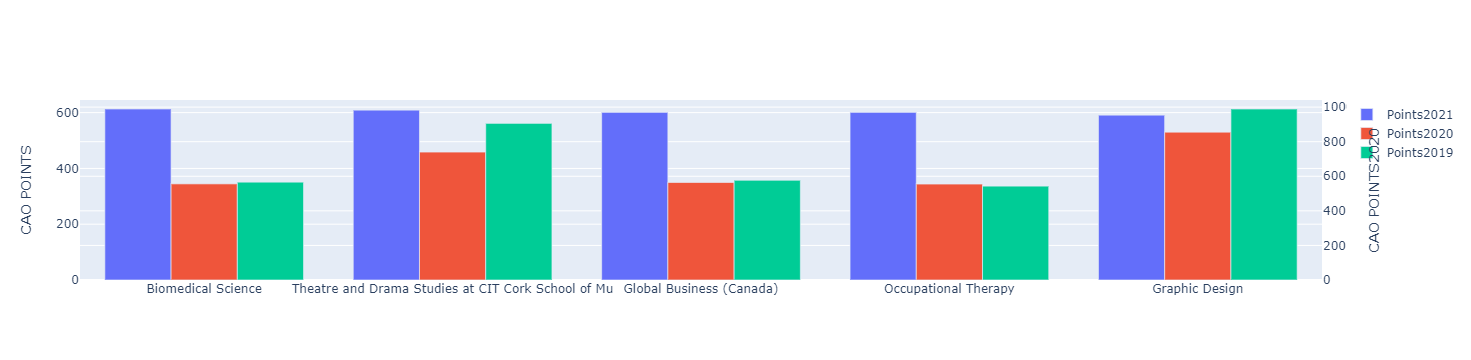

In [143]:
#ref https://www.weirdgeek.com/2020/05/plot-multiple-bar-graph-using-pythons-plotly-library/
fig = go.Figure(
    data=[
        go.Bar(name='Points2021', x=ac3top21["title"], y=ac3top21["points_r1_2021"], yaxis='y', offsetgroup=1),
        go.Bar(name='Points2020', x=ac3top21["title"], y=ac3top21["points_r1_2020"], yaxis='y2', offsetgroup=2),
        go.Bar(name='Points2019', x=ac3top21["title"], y=ac3top21["points_r1_2019"], yaxis='y2', offsetgroup=3)
    ],
    layout={
        'yaxis': {'title': 'CAO POINTS '},
        'yaxis2': {'title': 'CAO POINTS2020', 'overlaying': 'y', 'side': 'right'}
    , 'yaxis3':{'title': '','overlaying': 'y','side': 'right'}}
)
 
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

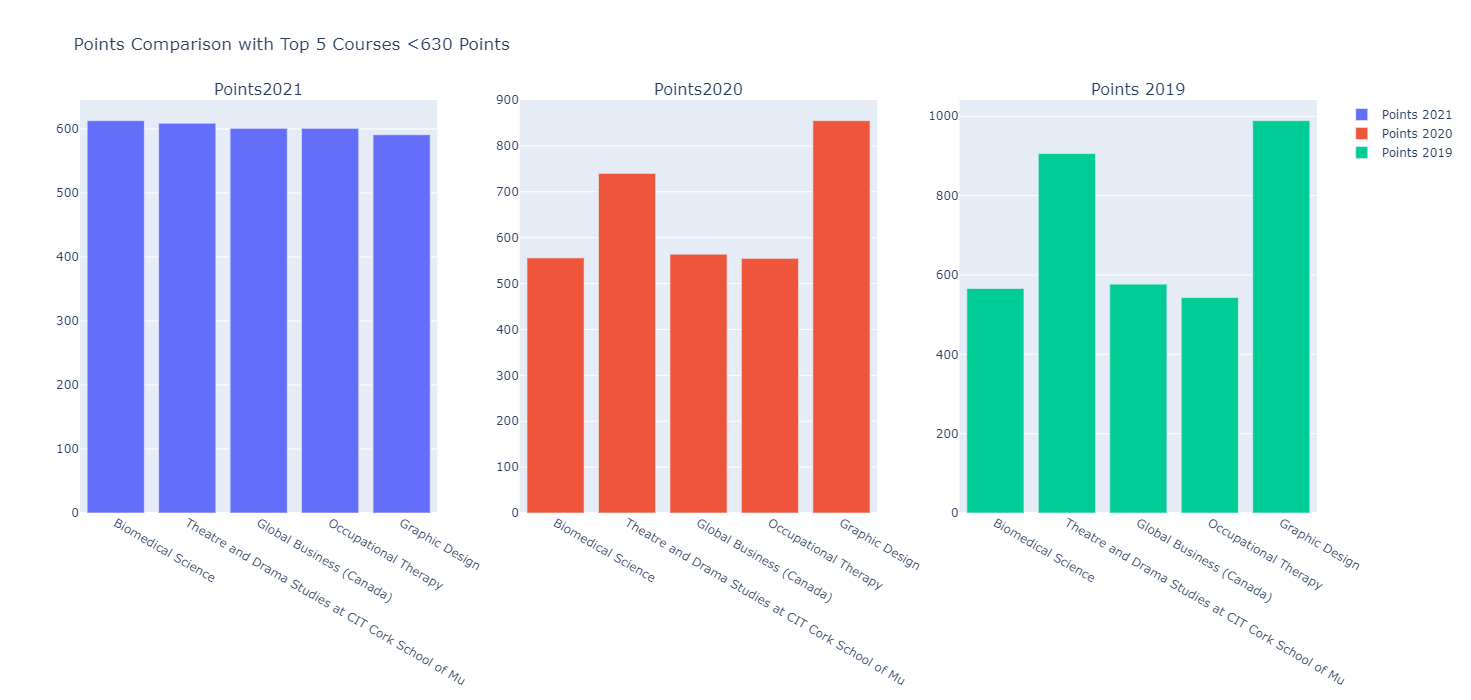

In [192]:
# The plots below are representing the top 5 courses from 2021 and what the points were for these courses in 2020 and 2019. It does not represent the top five courses from 2020 or 2019.
#https://plotly.com/python/subplots/#multiple-subplots-with-titles
#https://plotly.com/python-api-reference/generated/plotly.subplots.make_subplots.html
fig = make_subplots(rows=1,cols=3, subplot_titles = ('Points2021', 'Points2020', 'Points 2019'))
fig.add_trace(go.Bar(x=ac3top21['title'], y=ac3top21['points_r1_2021'], name = 'Points 2021'), row=1, col=1)
fig.add_trace(go.Bar(x=ac3top21['title'], y=ac3top21['points_r1_2020'], name = 'Points 2020'), row=1, col=2)
fig.add_trace(go.Bar(x=ac3top21['title'], y=ac3top21['points_r1_2019'], name = 'Points 2019'), row=1, col=3)

fig.update_layout(height=700, width=700,
                  title_text="Points Comparison with Top 5 Courses <630 Points in 2021")

fig.show()


In [177]:
ac3top20= ac3[(ac3['points_r1_2020'] >= 50) & (ac3['points_r1_2020'] < 630)]
#ac3top20= ac3[(ac3['points_r1_2021'] >= 50) & (ac3['points_r1_2020'] < 800)]

In [178]:
ac3top20=ac3top20.sort_values(by=['points_r1_2020'], ascending=False).head(5)

In [179]:
#CHECKPOINT. When I checked that CK702 was the highest course under 630 I found TU832 was higher at 622 but this wasn't in my AC3 dataset as this course wasn't on in 2019 so it was removed as a 
#comparasion course. I have a filter here that courses are displayed below 630. The top courses in 2020 points were above the 630 limit and so are displayiing as NAN below.
ac3top20


,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
CK702,Dentistry,NaN,613.0,613.0
TR052,Dental Science,NaN,613.0,602.0
TR034,Management Science and Information Systems Stu...,NaN,613.0,602.0
DN670,Economics and Finance,NaN,613.0,601.0
DN230,Actuarial and Financial Studies,NaN,601.0,589.0


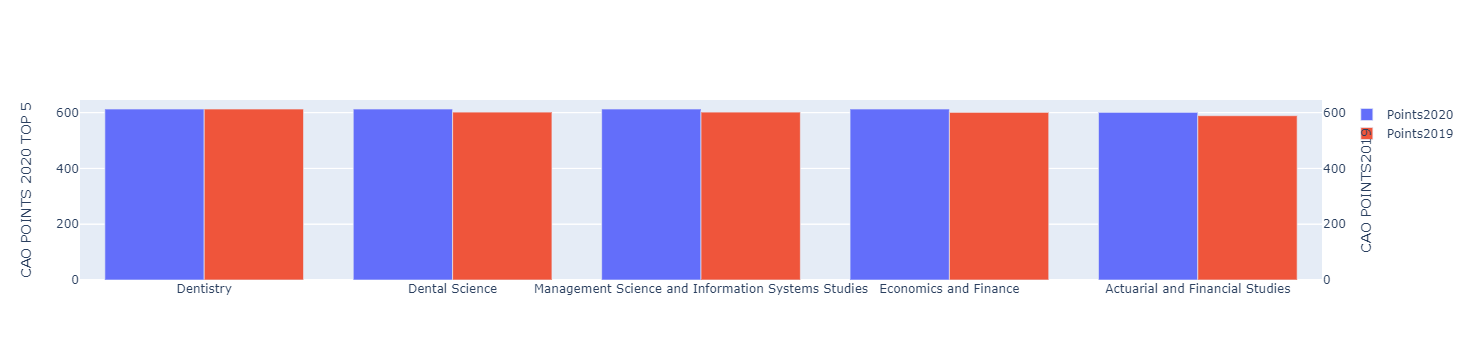

In [180]:
fig = go.Figure(
    data=[        
        go.Bar(name='Points2020', x=ac3top20["title"], y=ac3top20["points_r1_2020"], yaxis='y', offsetgroup=1),
        go.Bar(name='Points2019', x=ac3top20["title"], y=ac3top20["points_r1_2019"], yaxis='y2', offsetgroup=2),
            ],
    layout={
        'yaxis': {'title': 'CAO POINTS 2020 TOP 5 '},
        'yaxis2': {'title': 'CAO POINTS2019', 'overlaying': 'y', 'side': 'right'}
    }
)
 
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [182]:
ac3top19= ac3[(ac3['points_r1_2019'] >= 50) & (ac3['points_r1_2019'] < 630)]

In [184]:
ac3top19=ac3top19.sort_values(by=['points_r1_2019'], ascending=False).head(5)
ac3top19

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AD217,Illustration (portfolio),738.0,NaN,625.0
GY261,Business Studies in International Hotel Manage...,503.0,497.0,615.0
CK702,Dentistry,NaN,613.0,613.0
TR052,Dental Science,NaN,613.0,602.0
TR034,Management Science and Information Systems Stu...,NaN,613.0,602.0


In [188]:
ac3.dropna().nlargest(10, ['points_r1_2021','points_r1_2020','points_r1_2019'])

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
CR125,Popular Music at CIT Cork School of Music,1028.0,1088.0,1021.0
DL832,Animation,989.0,920.0,1055.0
LC114,Fashion and Textiles for Product and Costume (...,914.0,880.0,988.0
CR121,Music at CIT Cork School of Music,904.0,868.0,1052.0
LC502,Game Art and Design (portfolio),841.0,852.0,950.0


In [199]:
x = ac3.dropna()

In [198]:

dataFrameObject = pd.DataFrame(x, columns = ('points_r1_2021','points_r1_2020','points_r1_2019'));

print("Dataset:")

print(dataFrameObject);

Dataset:
       points_r1_2021  points_r1_2020  points_r1_2019
code                                                 
CR125          1028.0          1088.0          1021.0
GA887           201.0           244.0           296.0
MI001           209.0           375.0           381.0
DB510           217.0           234.0           293.0
GA380           218.0           242.0           289.0
...               ...             ...             ...
LC518           807.0           808.0           962.0
LC502           841.0           852.0           950.0
CR121           904.0           868.0          1052.0
LC114           914.0           880.0           988.0
DL832           989.0           920.0          1055.0

[638 rows x 3 columns]


In [201]:
#https://pythontic.com/pandas/dataframe-computations/difference
pointsdiff2021 = dataFrameObject.diff(axis=1);

print("Difference between columns(Period=1):");

print(pointsdiff2021);

Difference between columns(Period=1):
       points_r1_2021  points_r1_2020  points_r1_2019
code                                                 
CR125             NaN            60.0           -67.0
GA887             NaN            43.0            52.0
MI001             NaN           166.0             6.0
DB510             NaN            17.0            59.0
GA380             NaN            24.0            47.0
...               ...             ...             ...
LC518             NaN             1.0           154.0
LC502             NaN            11.0            98.0
CR121             NaN           -36.0           184.0
LC114             NaN           -34.0           108.0
DL832             NaN           -69.0           135.0

[638 rows x 3 columns]


In [210]:
#https://stackoverflow.com/questions/42100058/percentage-difference-between-any-two-columns-of-pandas-dataframe
percentdiff2021= x.apply(lambda row: (row.iloc[1]-row.iloc[2])/row.iloc[1]*100, axis=1)

In [231]:
p = percentdiff2021.nlargest(5)
p=pd.DataFrame(p).reset_index()
p.columns=['Code', '%ChangeinPoints']
p

,Code,%ChangeinPoints
0,TL801,60.863510
1,DL837,32.550336
2,TR028,31.325301
3,AC120,28.911565
4,LC392,28.048780


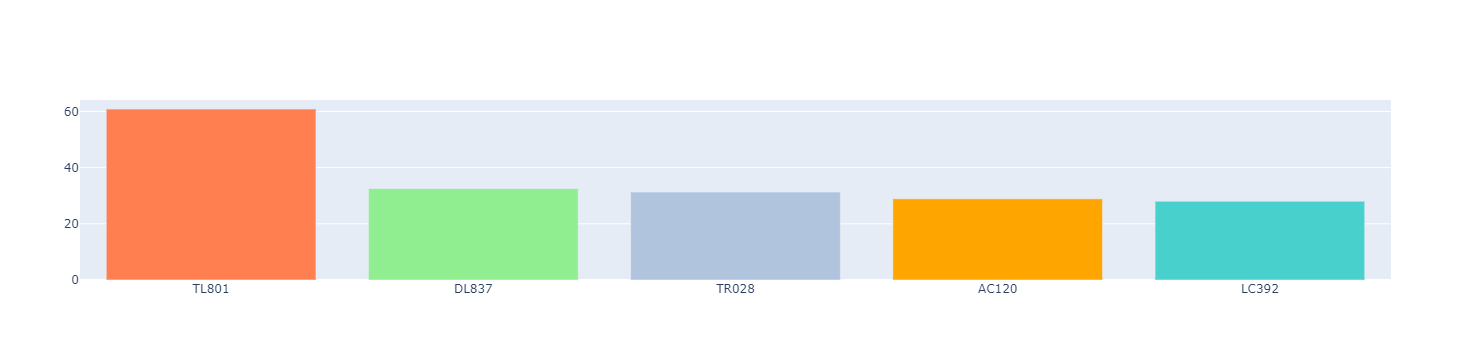

In [239]:
%matplotlib inline
fig = go.Figure()
fig.add_trace(go.Bar(x=p['Code'], y = p['%ChangeinPoints'], marker_color=['coral','lightgreen', 'lightsteelblue', 'orange', 'mediumturquoise']))
fig.show()


In [212]:
#Checkpoint to see what the difference is between the points on the highesr percent change course on the dataframe 
ac3.loc['TL801']

title             Animation  Visual Effects and Motion Design (L...
points_r1_2021                                                718.0
points_r1_2020                                                281.0
points_r1_2019                                                341.0
Name: TL801, dtype: object

In [213]:
ac3.loc['DL837']

title             New Media Studies
points_r1_2021                298.0
points_r1_2020                201.0
points_r1_2019                349.0
Name: DL837, dtype: object

In [ ]:
# percentage change in points between 2021 and 2020
percentdiff2021= x.apply(lambda row: (row.iloc[1]-row.iloc[2])/row.iloc[1]*100, axis=1)

In [217]:
percentdiff2020 = x.apply(lambda row: (row.iloc[2]-row.iloc[3])/row.iloc[2]*100, axis=1)
percentdiff2020.nlargest(10)

code
GA283    49.926362
GC300    29.603730
DB502    21.114370
DB526    17.002882
DK832    14.987080
CW058    12.080537
TR097    11.616162
CW478    11.547344
LC265    10.895884
AD215    10.344828
dtype: float64

In [219]:
ac3.loc['GA283']

title             Contemporary Art (portfolio)
points_r1_2021                           790.0
points_r1_2020                           679.0
points_r1_2019                           340.0
Name: GA283, dtype: object

In [173]:
# Lets have a look at the top colleges for points.df2021. We need to group the colleges together by their code


,title,points_r1_2021,points_r2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [244]:
ac3

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
MH801,Early Childhood - Teaching and Learning (part-...,NaN,327.0,358.0
MH116,Community and Youth Work (Full-Time),NaN,NaN,271.0
MH103,Music,NaN,NaN,367.0
CR125,Popular Music at CIT Cork School of Music,1028.0,1088.0,1021.0
GA887,History and Geography,201.0,244.0,296.0
...,...,...,...,...
LC518,Digital Animation Production (portfolio),807.0,808.0,962.0
LC502,Game Art and Design (portfolio),841.0,852.0,950.0
CR121,Music at CIT Cork School of Music,904.0,868.0,1052.0


In [ ]:
#Lets group the colleges together based on the code column and the prefix that the courses use
